In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = Path('/content/gdrive/My Drive/Dataset/')

In [ ]:
train_fnames = get_image_files(path/"Train")

In [ ]:
augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=23),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls = dblock.dataloaders(train_fnames)


In [ ]:
# print number of classes and length of train and valid datasets
dls.c, len(dls.train_ds), len(dls.valid_ds)

(2, 1180, 295)

In [ ]:
dls.vocab

['Kidney_stone', 'Normal']

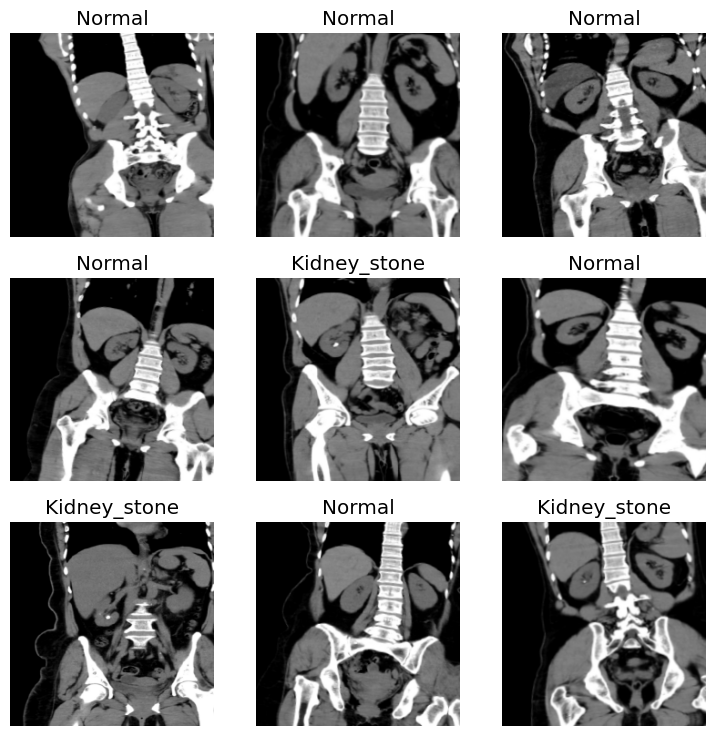

In [ ]:
dls.show_batch()

In [ ]:
model = nn.Sequential(create_body(xresnet50(), pretrained=False),create_head(nf=2048, n_out=2))
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)



In [ ]:
learn.fit_one_cycle(40,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.808375,1.475212,0.413559,03:58
1,0.729612,0.692919,0.538983,00:57
2,0.699601,0.784598,0.671186,00:57
3,0.673131,0.902041,0.600000,00:54
4,0.666980,1.403681,0.616949,00:56
5,0.645272,2.923817,0.589831,00:54
6,0.627240,0.509826,0.850847,00:57
7,0.586593,3.894930,0.600000,00:54
8,0.576001,28.552271,0.413559,00:54
9,0.557561,0.635019,0.810170,00:53


In [ ]:
learn.save(path/'kidney-50')

Path('/content/gdrive/My Drive/Dataset/kidney-50.pth')

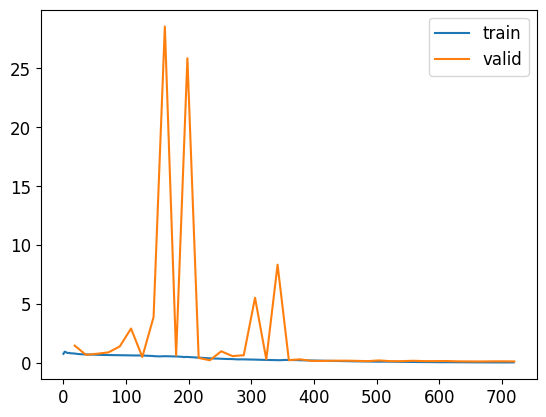

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
#test_items = get_image_files(path/"Test")
all_files= get_image_files(path)

# Evaluating model performance using the unseen test set

In [ ]:

augs = [RandomResizedCropGPU(size=224, min_scale=0.75), Rotate(), Zoom()]
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                   get_y=parent_label,
                   item_tfms=Resize(512, method="squish"),
                   batch_tfms=augs,
                   )

dls_test = dblock.dataloaders(all_files)



In [ ]:
print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 346


In [ ]:
model = nn.Sequential(create_body(xresnet50(), pretrained=False),create_head(nf=2048, n_out=2))

In [ ]:
learn1 = learn1 = Learner(dls_test, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy).load('/content/gdrive/My Drive/Dataset/kidney-50')

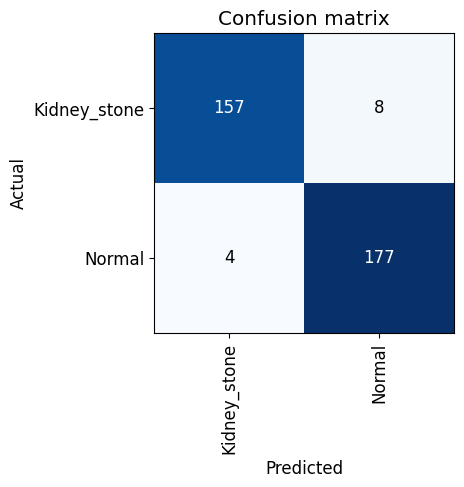

In [ ]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()


In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

Kidney_stone       0.98      0.95      0.96       165
      Normal       0.96      0.98      0.97       181

    accuracy                           0.97       346
   macro avg       0.97      0.96      0.97       346
weighted avg       0.97      0.97      0.97       346

